In [43]:
import numpy as np
import pandas as pd

from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
sns.set();

path = Path.cwd().parent.parent.joinpath('results').joinpath('all_results.csv')

In [44]:
results_df = pd.read_csv(path)
results_df.head()

optim_alg  run  pso_steps  pso_n_particles  pso_iter_n  gen_pop_size  \
0       pso    2     5000.0             10.0        20.0           NaN   
1       pso    2     5000.0             10.0        20.0           NaN   
2       pso    2     5000.0             10.0        20.0           NaN   
3       pso    2     5000.0             10.0        20.0           NaN   
4       pso    2     5000.0             10.0        20.0           NaN   

   gen_mutation_rate  gen_selection_rate gen_selection_strategy  field_x  \
0                NaN                 NaN                    NaN      100   
1                NaN                 NaN                    NaN      100   
2                NaN                 NaN                    NaN      100   
3                NaN                 NaN                    NaN      100   
4                NaN                 NaN                    NaN      100   

   field_y  n_bots  trail_decay  p_resource  resource_dist_mean  \
0      100      10          100        0.01                  10   
1      100      10          100        0.01                  10   
2      100      10          100        0.01                  10   
3      100      10          100        0.01                  10   
4      100      10          100        0.01                  10   

   resource_dist_std   p_leave  p_follow  cost  is_selected  
0                  3  0.452631  0.273623   283          NaN  
1                  3  0.127068  0.728604   130          NaN  
2                  3  0.960978  0.363459   258          NaN  
3                  3  0.842896  0.280287   275          NaN  
4                  3  0.682329  0.930724   306          NaN

In [45]:
results_df.shape

(176846, 20)

In [46]:
results_df[results_df['p_leave'] > 1] = 1
results_df[results_df['p_follow'] > 1] = 1

results_df[results_df['p_leave'] < 0] = 0
results_df[results_df['p_follow'] < 0] = 0

results_df['r_p_follow'] = results_df['p_follow'].apply(lambda x : np.round(x, 2))
results_df['r_p_leave'] = results_df['p_leave'].apply(lambda x : np.round(x, 2))


In [47]:
gen_results_df = results_df[results_df['optim_alg'] == 'gen']

In [48]:
## transformations
results_df.describe()

run     pso_steps  pso_n_particles    pso_iter_n  \
count  176846.000000  67916.000000     67916.000000  67916.000000   
mean      531.079657   2469.878217         6.984643     10.381780   
std       471.664307   2499.332658         6.481696      9.501272   
min         0.000000      0.000000         0.000000      0.000000   
25%        44.000000      1.000000         1.000000      1.000000   
50%       168.000000      1.000000         1.000000      1.000000   
75%      1001.000000   5000.000000        14.000000     20.000000   
max      1001.000000   5000.000000        20.000000     20.000000   

        gen_pop_size  gen_mutation_rate  gen_selection_rate        field_x  \
count  143304.000000      143304.000000       143304.000000  176846.000000   
mean       17.893143           0.315009            0.315009      80.756415   
std        10.059395           0.383885            0.383885      39.177528   
min         0.000000           0.000000            0.000000       0.000000   
25%        15.000000           0.100000            0.100000     100.000000   
50%        25.000000           0.100000            0.100000     100.000000   
75%        25.000000           0.100000            0.100000     100.000000   
max        25.000000           1.000000            1.000000     100.000000   

             field_y         n_bots    trail_decay     p_resource  \
count  176846.000000  176846.000000  176846.000000  176846.000000   
mean       80.756415       8.249941      80.756415       0.342240   
std        39.177528       3.563000      39.177528       0.399445   
min         0.000000       0.000000       0.000000       0.000000   
25%       100.000000      10.000000     100.000000       0.010000   
50%       100.000000      10.000000     100.000000       0.085000   
75%       100.000000      10.000000     100.000000       0.700000   
max       100.000000      10.000000     100.000000       1.000000   

       resource_dist_mean  resource_dist_std        p_leave       p_follow  \
count       176846.000000      176846.000000  176846.000000  176846.000000   
mean             8.249941           2.610548       0.791625       0.761097   
std              3.563000           0.793319       0.203804       0.207919   
min              0.000000           0.000000       0.000000       0.000000   
25%             10.000000           3.000000       0.664783       0.649185   
50%             10.000000           3.000000       0.845034       0.787953   
75%             10.000000           3.000000       0.967443       0.934342   
max             10.000000           3.000000       1.000000       1.000000   

                cost   is_selected     r_p_follow      r_p_leave  
count  176846.000000  34374.000000  176846.000000  176846.000000  
mean      556.087579      0.996364       0.761217       0.791537  
std       483.640582      0.060194       0.207975       0.203819  
min         0.000000      0.000000       0.000000       0.000000  
25%        93.000000      1.000000       0.650000       0.660000  
50%       540.000000      1.000000       0.790000       0.850000  
75%       888.000000      1.000000       0.930000       0.970000  
max      1574.000000      1.000000       1.000000       1.000000

<AxesSubplot:xlabel='p_leave', ylabel='p_follow'>

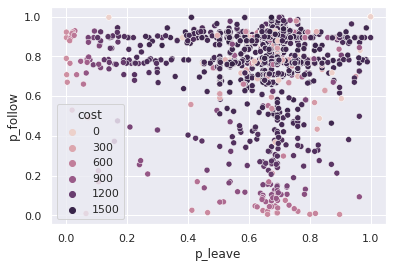

In [50]:
sns.scatterplot(data= results_df[results_df['p_resource'] == 1], x = 'p_leave', y = 'p_follow', hue = 'cost')

In [29]:
grouped_by_rounded_df = results_df[['r_p_follow', 'r_p_leave', 'p_resource', 'cost']].groupby(['r_p_follow', 'r_p_leave', 'p_resource']).mean().reset_index()

In [34]:
sns.scatterplot(data= grouped_by_rounded_df[grouped_by_rounded_df['p_resource'] == 0.1 & grouped_by_rounded_df['cost'] > 300], x = 'r_p_leave', y = 'r_p_follow', hue = 'cost')

TypeError: Cannot perform 'rand_' with a dtyped [float64] array and scalar of type [bool]